In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
yelp = pd.read_csv('yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [9]:
yelp['text length'] = yelp['text'].apply(len)

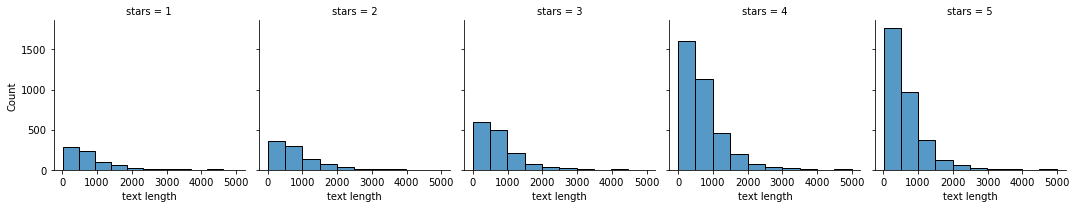

In [44]:
sns.FacetGrid(data=yelp,col='stars').map(sns.histplot,'text length',bins=10)

[Text(0.5, 1.0, 'Box plot of text length for each star category')]

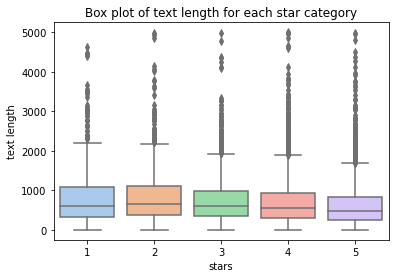

In [46]:
sns.boxplot(data=yelp,x='stars',y='text length',palette='pastel').set(title='Box plot of text length for each star category')

[Text(0.5, 1.0, 'Number of occurances for each type of star rating')]

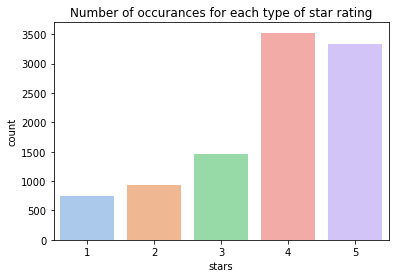

In [45]:
sns.countplot(data=yelp,x='stars', palette='pastel').set(title='Number of occurances for each type of star rating')

Mean values of numerical columns grouped by number of stars.

In [59]:
yelp.groupby('stars').mean()

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


Correlation of mean values of numerical columns.

In [60]:
yelp.groupby('stars').mean().corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


[Text(0.5, 1.0, 'Correlation of Mean Values')]

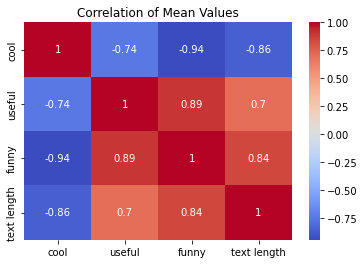

In [63]:
sns.heatmap(yelp.groupby('stars').mean().corr(),cmap='coolwarm',
           annot=True).set(title='Correlation of Mean Values')

# NLP Classification

In [75]:
yelp_class = pd.DataFrame(yelp[(yelp['stars']==1) | (yelp['stars']==5)])

In [78]:
X=yelp_class['text']
y=yelp_class['stars']

In [102]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

cv= CountVectorizer(stop_words=ENGLISH_STOP_WORDS)

In [103]:
X = cv.fit_transform(X)

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Train the model

We will use Naive Bayes Classifier:

In [106]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

In [107]:
nb.fit(X_train, y_train)

MultinomialNB()

# Predictions and Evaluations

In [108]:
predictions = nb.predict(X_test)

In [109]:
from sklearn.metrics import classification_report, confusion_matrix

In [110]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test,predictions))

[[162  66]
 [ 34 964]]


              precision    recall  f1-score   support

           1       0.83      0.71      0.76       228
           5       0.94      0.97      0.95       998

    accuracy                           0.92      1226
   macro avg       0.88      0.84      0.86      1226
weighted avg       0.92      0.92      0.92      1226



**The result is good but we try to include TF-IDF to the process using a pipeline.**

In [111]:
from sklearn.feature_extraction.text import TfidfTransformer

In [112]:
from sklearn.pipeline import Pipeline

In [113]:
pipeline=Pipeline([('bag_of_words',CountVectorizer(stop_words=ENGLISH_STOP_WORDS)),  # strings to token integer counts
                  ('tfidf',TfidfTransformer()),                                      # integer counts to weighted TF-IDF scores
                  ('classifier',MultinomialNB())])                                   # train on TF-IDF vectors w/ Naive Bayes classifier

**The pipeline includes all the steps, we will redo train-test-split since we overoverwrote the X as the CountVectorized version.**

In [114]:
X=yelp_class['text']
y=yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [115]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bag_of_words',
                 CountVectorizer(stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', 'anyone',
                                                       '

# Predictions and Evaluations

In [116]:
predictions = pipeline.predict(X_test)

In [117]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[  0 228]
 [  0 998]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\fateh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fateh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fateh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**It looks like the Tf-Idf made things worse for this data set.**

In [127]:
import nltk

In [191]:
#nltk.download_shell() #Download stopwords

## Creating a function to process our text and remove punctuation and very common words and remove Tf-Idf scores.

In [132]:
from nltk.corpus import stopwords

In [133]:
import string

In [148]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [154]:
pipeline=Pipeline([('bag_of_words',CountVectorizer(analyzer=text_process)),  
                  ('classifier',MultinomialNB())])  

In [155]:
X=yelp_class['text']
y=yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [156]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bag_of_words',
                 CountVectorizer(analyzer=<function text_process at 0x000001705905F1F0>)),
                ('classifier', MultinomialNB())])

In [157]:
predictions = pipeline.predict(X_test)

In [158]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[143  85]
 [ 11 987]]


              precision    recall  f1-score   support

           1       0.93      0.63      0.75       228
           5       0.92      0.99      0.95       998

    accuracy                           0.92      1226
   macro avg       0.92      0.81      0.85      1226
weighted avg       0.92      0.92      0.92      1226



**There is a little improvement in precision but overall result looks the same.**

## Using stemming and removing punctuations and common words. 

In [176]:
# nltk.download_shell() #Download Porter_test and punkt

In [183]:
from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()

In [184]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    tokenized = nltk.word_tokenize(nopunc)
    return [porter_stemmer.stem(word) for word in tokenized if word.lower() not in stopwords.words('english')]

In [185]:
X.head().apply(text_process)

0    [wife, took, birthday, breakfast, excel, weath...
1    [idea, peopl, give, bad, review, place, goe, s...
3    [rosi, dakota, love, chaparr, dog, park, conve...
4    [gener, manag, scott, petello, good, egg, go, ...
6    [drop, your, drive, ate, go, back, next, day, ...
Name: text, dtype: object

In [186]:
pipeline=Pipeline([('bag_of_words',CountVectorizer(analyzer=text_process)),  
                  ('classifier',MultinomialNB())]) 

In [187]:
X=yelp_class['text']
y=yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [188]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bag_of_words',
                 CountVectorizer(analyzer=<function text_process at 0x000001705A220B80>)),
                ('classifier', MultinomialNB())])

In [189]:
predictions = pipeline.predict(X_test)

In [190]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[162  66]
 [ 24 974]]


              precision    recall  f1-score   support

           1       0.87      0.71      0.78       228
           5       0.94      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.90      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



**It looks like by using stemming to link all the words to their root word we have an improvement in overall result.**